<a href="https://colab.research.google.com/github/Adarsh3589/Normal_distrribution-/blob/main/Welcome_To_Colab-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anderson-Darling Test Statistic: 0.45581292193114464
Significance Level: 15.0%, Critical Value: 0.505
Significance Level: 10.0%, Critical Value: 0.575
Significance Level: 5.0%, Critical Value: 0.69
Significance Level: 2.5%, Critical Value: 0.804
Significance Level: 1.0%, Critical Value: 0.957


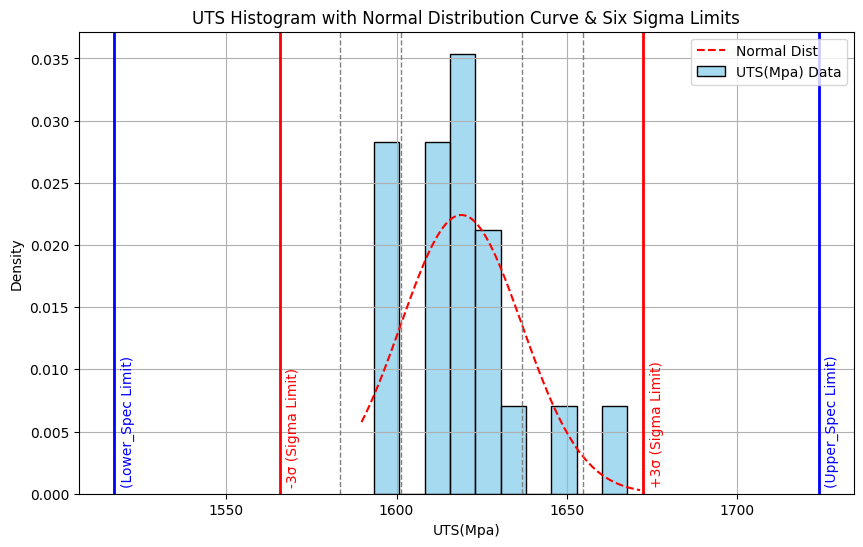

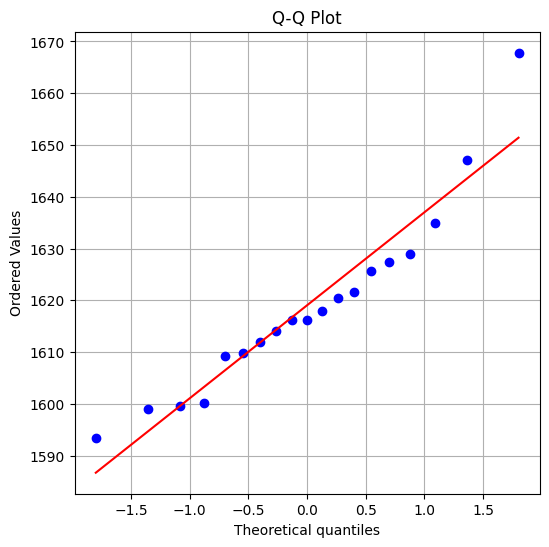

In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm, probplot
import numpy as np

# Step 2: Manually input the data as a dictionary (can be read from CSV too)
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'UTS(Mpa)': [
        1635, 1667.83, 1609.22, 1647.19, 1627.35, 1620.51, 1628.92,
        1616.29, 1599.64, 1621.64, 1614.03, 1616.29, 1609.83,
        1612.03, 1625.66, 1599.04, 1600.26, 1593.44, 1617.98
    ]
}

# Step 3: Convert to DataFrame
df = pd.DataFrame(data)

# Step 4: Run Anderson-Darling normality test
result = anderson(df['UTS(Mpa)'], dist='norm')

print("Anderson-Darling Test Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    print(f"Significance Level: {result.significance_level[i]}%, Critical Value: {result.critical_values[i]}")

# Step 5: Plot Histogram with Normal Distribution using seaborn
mean = df['UTS(Mpa)'].mean()
std = df['UTS(Mpa)'].std()

plt.figure(figsize=(10, 6))
sns.histplot(df['UTS(Mpa)'], kde=False, stat='density', bins=10, color='skyblue', label='UTS(Mpa) Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r--', label='Normal Dist')

# Plotting ±1σ, ±2σ, ±3σ range bands
for i in range(1, 4):
    plt.axvline(mean + (i * std), color='grey', linestyle='--', linewidth=1)
    plt.axvline(mean - (i * std), color='grey', linestyle='--', linewidth=1)


plt.axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
plt.axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
plt.text(mean + 3*std + 2, 0.0005, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=10, va='bottom')
plt.text(mean - 3*std + 2, 0.0005, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=10, va='bottom')

Lower_Spec= 1517
Upper_Spec = 1724

plt.axvline(Lower_Spec, color='Blue', linestyle='-', linewidth=2)
plt.axvline(Upper_Spec, color='Blue', linestyle='-', linewidth=2)
plt.text(Upper_Spec + 2, 0.0005, '(Upper_Spec Limit)', rotation=90, color='blue', fontsize=10, va='bottom')
plt.text(Lower_Spec + 2, 0.0005, '(Lower_Spec Limit)', rotation=90, color='blue', fontsize=10, va='bottom')


plt.title('UTS Histogram with Normal Distribution Curve & Six Sigma Limits')
plt.xlabel('UTS(Mpa)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Create Quantile-Quantile Plot
plt.figure(figsize=(6, 6))
probplot(df['UTS(Mpa)'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()


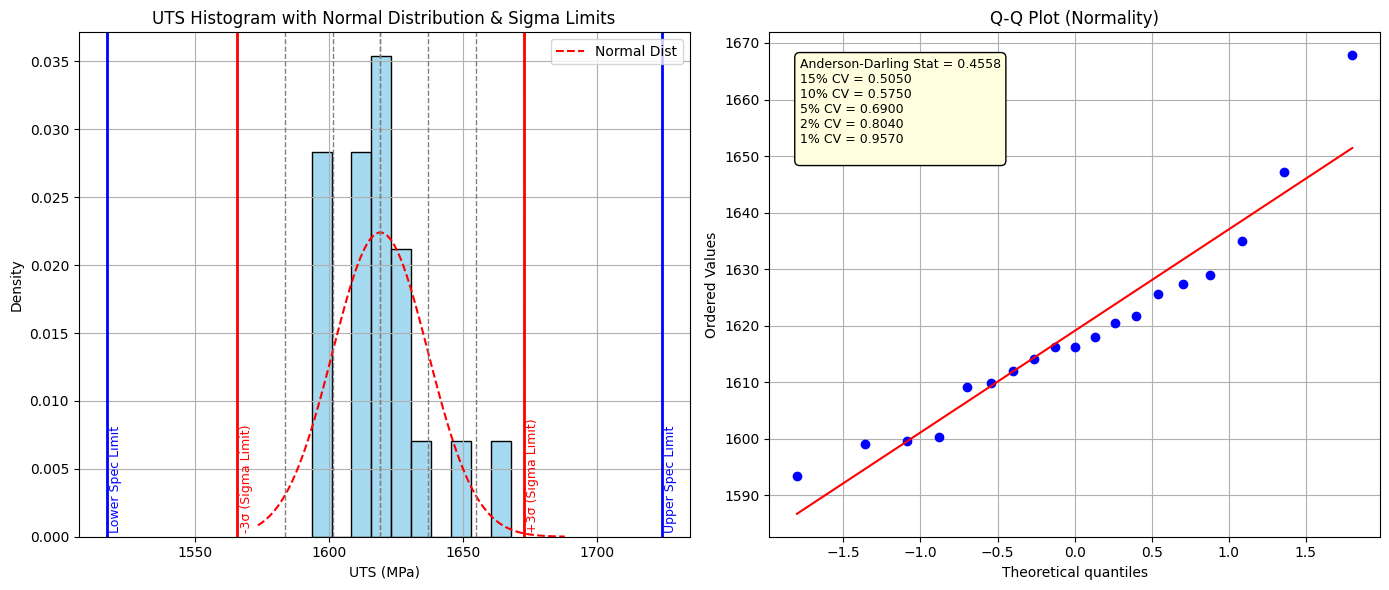

In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm, probplot
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'UTS(Mpa)': [
        1635, 1667.83, 1609.22, 1647.19, 1627.35, 1620.51, 1628.92,
        1616.29, 1599.64, 1621.64, 1614.03, 1616.29, 1609.83,
        1612.03, 1625.66, 1599.04, 1600.26, 1593.44, 1617.98
    ]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
mean = df['UTS(Mpa)'].mean()
std = df['UTS(Mpa)'].std()

# Step 4: Anderson-Darling Test
result = anderson(df['UTS(Mpa)'], dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Prepare plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === Left Plot: Histogram with Normal Distribution === #
sns.histplot(df['UTS(Mpa)'], kde=False, stat='density', bins=10, color='skyblue', ax=axes[0], edgecolor='black')

# Normal curve
x = np.linspace(df['UTS(Mpa)'].min() - 20, df['UTS(Mpa)'].max() + 20, 100)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Six Sigma lines
for i in range(0, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

# ±3σ in red
axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 1, 0.0005, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 1, 0.0005, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 1517
Upper_Spec = 1724
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].axvline(Upper_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Upper_Spec + 1, 0.0005, 'Upper Spec Limit', rotation=90, color='blue', fontsize=9)
axes[0].text(Lower_Spec + 1, 0.0005, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

# Set labels and grid
axes[0].set_title('UTS Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('UTS (MPa)')
axes[0].set_ylabel('Density')
axes[0].grid(True)
axes[0].legend()

# === Right Plot: Q-Q Plot with AD test results === #
probplot(df['UTS(Mpa)'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normality)')

# Annotate Anderson-Darling stats
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

axes[1].grid(True)

# Show combined plots
plt.tight_layout()
plt.show()


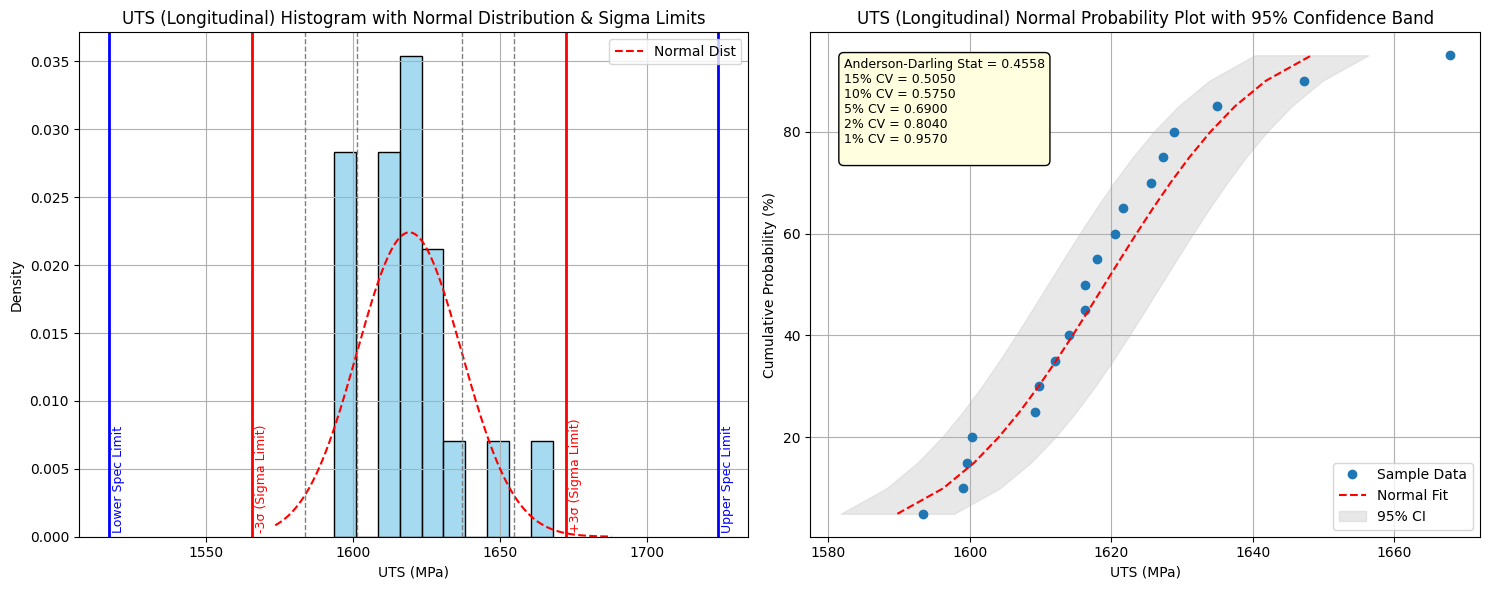

In [17]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'UTS(Mpa)': [
        1635, 1667.83, 1609.22, 1647.19, 1627.35, 1620.51, 1628.92,
        1616.29, 1599.64, 1621.64, 1614.03, 1616.29, 1609.83,
        1612.03, 1625.66, 1599.04, 1600.26, 1593.44, 1617.98
    ]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
uts = df['UTS(Mpa)'].sort_values().values
mean = np.mean(uts)
std = np.std(uts, ddof=1)
n = len(uts)

# Step 4: Anderson-Darling Test
result = anderson(uts, dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === Left Plot: Histogram === #
sns.histplot(uts, kde=False, stat='density', bins=10, color='skyblue', ax=axes[0], edgecolor='black')
x = np.linspace(min(uts) - 20, max(uts) + 20, 200)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Sigma limits
for i in range(1, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 1, 0.0005, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 1, 0.0005, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 1517
Upper_Spec = 1724
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].axvline(Upper_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Upper_Spec + 1, 0.0005, 'Upper Spec Limit', rotation=90, color='blue', fontsize=9)
axes[0].text(Lower_Spec + 1, 0.0005, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

axes[0].set_title('UTS (Longitudinal) Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('UTS (MPa)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# === Right Plot: Normal Probability Plot === #
# Calculate normal probability values
sorted_data = uts
percentiles = np.arange(1, n+1) / (n + 1) * 100  # cumulative percentage
theoretical_quantiles = norm.ppf(percentiles / 100, loc=mean, scale=std)

# Confidence interval bounds (approximate for normal)
z_critical = 1.96  # for 95%
se = (std / np.sqrt(n))  # standard error
ci_upper = theoretical_quantiles + z_critical * se
ci_lower = theoretical_quantiles - z_critical * se

# Plot data points
axes[1].plot(sorted_data, percentiles, 'o', label='Sample Data')
axes[1].plot(theoretical_quantiles, percentiles, 'r--', label='Normal Fit')
axes[1].fill_betweenx(percentiles, ci_lower, ci_upper, color='lightgray', alpha=0.5, label='95% CI')

# Labels and annotation
axes[1].set_title('UTS (Longitudinal) Normal Probability Plot with 95% Confidence Band')
axes[1].set_xlabel('UTS (MPa)')
axes[1].set_ylabel('Cumulative Probability (%)')
axes[1].grid(True)
axes[1].legend()

# Anderson-Darling annotation
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

# Final layout
plt.tight_layout()
plt.show()


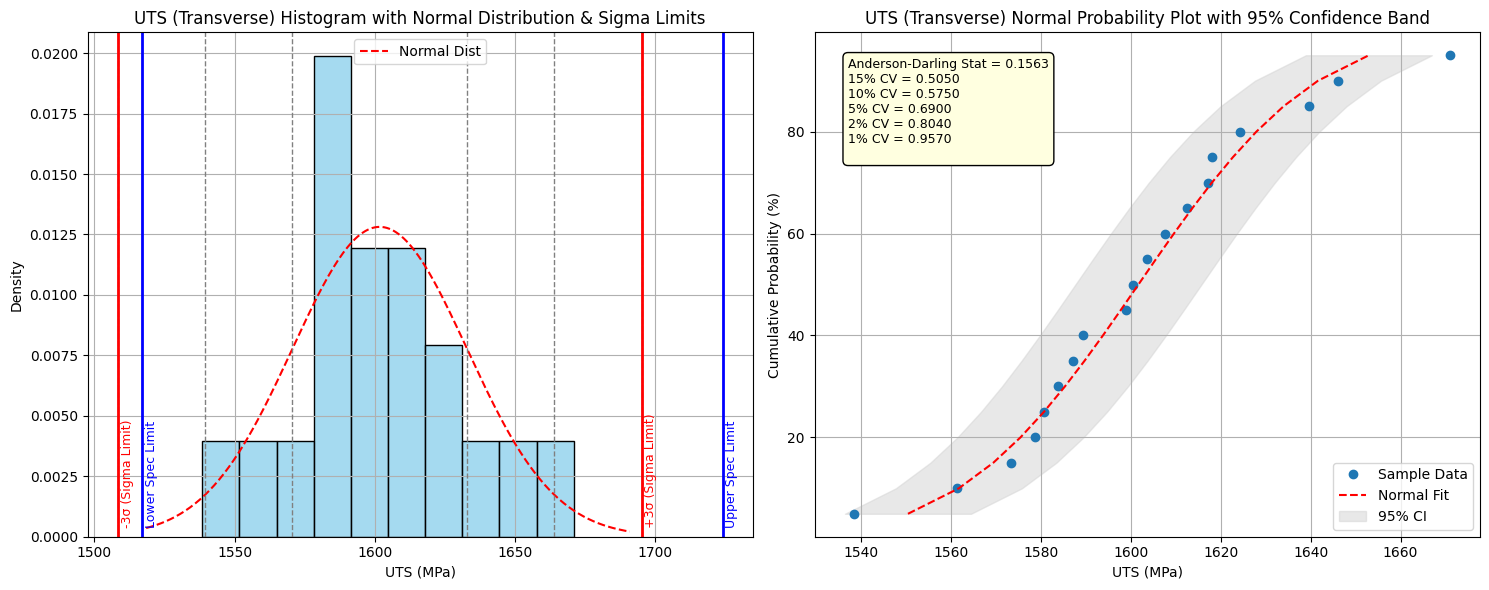

In [18]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'UTS(Mpa)': [ 1603.75,1670.92,1646.01,1612.48,1607.73,1639.56,1589.44,1583.97,1538.45,1618.19,1617.26,1573.44,1624.3,1580.73,1578.82,1587.12,1561.33,1598.93,1600.51]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
uts = df['UTS(Mpa)'].sort_values().values
mean = np.mean(uts)
std = np.std(uts, ddof=1)
n = len(uts)

# Step 4: Anderson-Darling Test
result = anderson(uts, dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === Left Plot: Histogram === #
sns.histplot(uts, kde=False, stat='density', bins=10, color='skyblue', ax=axes[0], edgecolor='black')
x = np.linspace(min(uts) - 20, max(uts) + 20, 200)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Sigma limits
for i in range(1, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 1, 0.0005, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 1, 0.0005, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 1517
Upper_Spec = 1724
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].axvline(Upper_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Upper_Spec + 1, 0.0005, 'Upper Spec Limit', rotation=90, color='blue', fontsize=9)
axes[0].text(Lower_Spec + 1, 0.0005, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

axes[0].set_title('UTS (Transverse) Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('UTS (MPa)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# === Right Plot: Normal Probability Plot === #
# Calculate normal probability values
sorted_data = uts
percentiles = np.arange(1, n+1) / (n + 1) * 100  # cumulative percentage
theoretical_quantiles = norm.ppf(percentiles / 100, loc=mean, scale=std)

# Confidence interval bounds (approximate for normal)
z_critical = 1.96  # for 95%
se = (std / np.sqrt(n))  # standard error
ci_upper = theoretical_quantiles + z_critical * se
ci_lower = theoretical_quantiles - z_critical * se

# Plot data points
axes[1].plot(sorted_data, percentiles, 'o', label='Sample Data')
axes[1].plot(theoretical_quantiles, percentiles, 'r--', label='Normal Fit')
axes[1].fill_betweenx(percentiles, ci_lower, ci_upper, color='lightgray', alpha=0.5, label='95% CI')

# Labels and annotation
axes[1].set_title('UTS (Transverse) Normal Probability Plot with 95% Confidence Band')
axes[1].set_xlabel('UTS (MPa)')
axes[1].set_ylabel('Cumulative Probability (%)')
axes[1].grid(True)
axes[1].legend()

# Anderson-Darling annotation
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

# Final layout
plt.tight_layout()
plt.show()


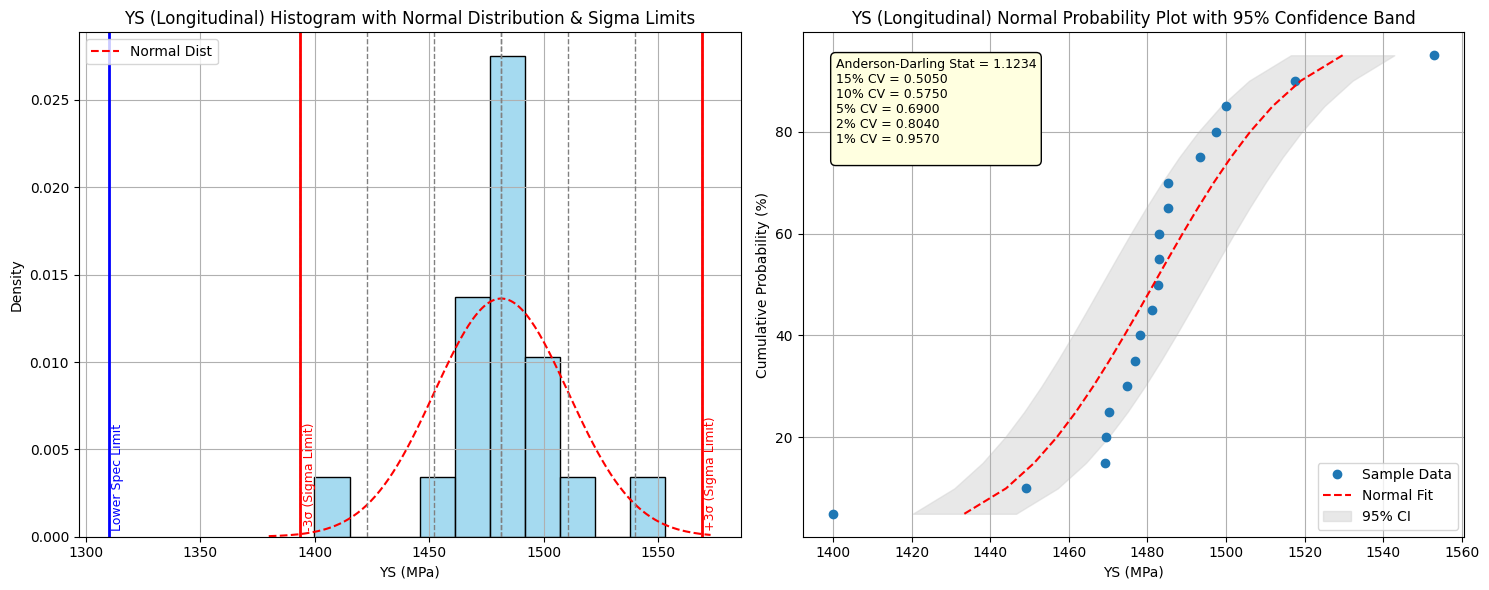

In [21]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'YS(Mpa)': [1553.01,1482.9,1469.41,1476.88,1474.74,1500.06,1481.27,1485.12,1482.78,1449.05,1493.48,1485.12,1470.19,1497.31,1478.13,1399.88,1482.83,1469.1,1517.66]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
YS = df['YS(Mpa)'].sort_values().values
mean = np.mean(YS)
std = np.std(YS, ddof=1)
n = len(YS)

# Step 4: Anderson-Darling Test
result = anderson(YS, dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === Left Plot: Histogram === #
sns.histplot(YS, kde=False, stat='density', bins=10, color='skyblue', ax=axes[0], edgecolor='black')
x = np.linspace(min(YS) - 20, max(YS) + 20, 200)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Sigma limits
for i in range(0, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 1, 0.0005, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 1, 0.0005, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 1310
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Lower_Spec + 1, 0.0005, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

axes[0].set_title('YS (Longitudinal) Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('YS (MPa)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# === Right Plot: Normal Probability Plot === #
# Calculate normal probability values
sorted_data = YS
percentiles = np.arange(1, n+1) / (n + 1) * 100  # cumulative percentage
theoretical_quantiles = norm.ppf(percentiles / 100, loc=mean, scale=std)

# Confidence interval bounds (approximate for normal)
z_critical = 1.96  # for 95%
se = (std / np.sqrt(n))  # standard error
ci_upper = theoretical_quantiles + z_critical * se
ci_lower = theoretical_quantiles - z_critical * se

# Plot data points
axes[1].plot(sorted_data, percentiles, 'o', label='Sample Data')
axes[1].plot(theoretical_quantiles, percentiles, 'r--', label='Normal Fit')
axes[1].fill_betweenx(percentiles, ci_lower, ci_upper, color='lightgray', alpha=0.5, label='95% CI')

# Labels and annotation
axes[1].set_title('YS (Longitudinal) Normal Probability Plot with 95% Confidence Band')
axes[1].set_xlabel('YS (MPa)')
axes[1].set_ylabel('Cumulative Probability (%)')
axes[1].grid(True)
axes[1].legend()

# Anderson-Darling annotation
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

# Final layout
plt.tight_layout()
plt.show()


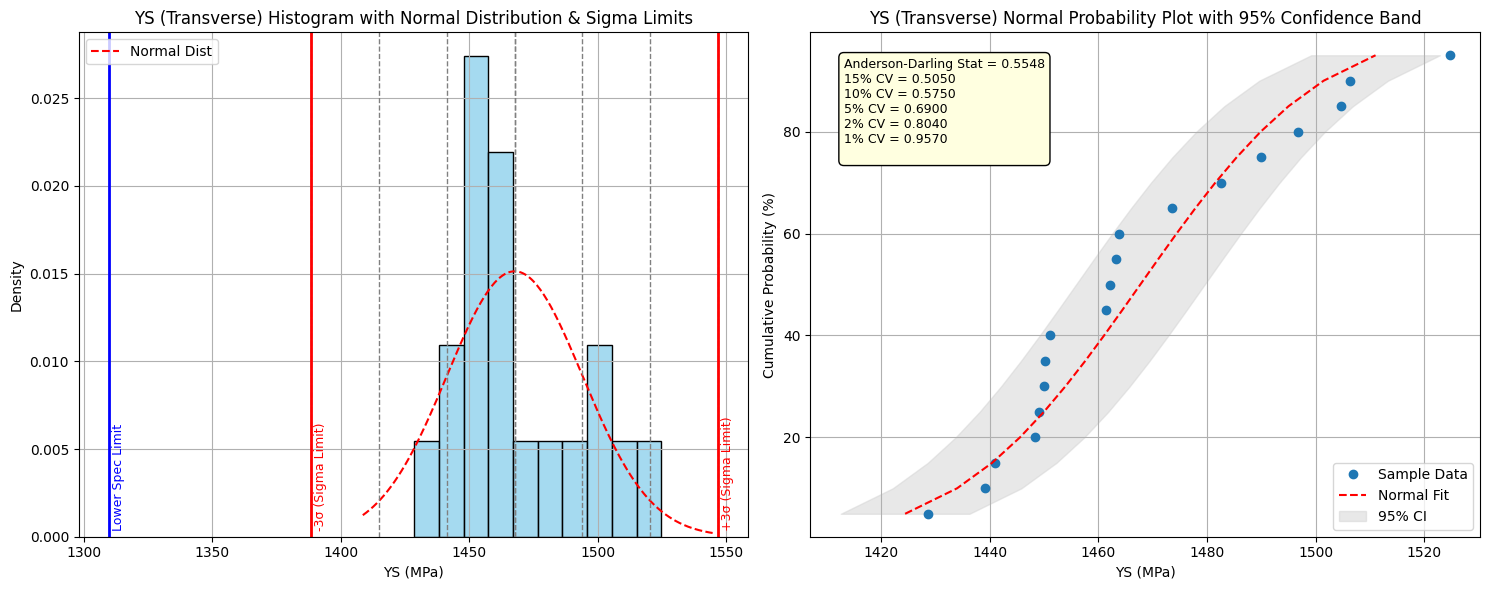

In [22]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'YS(Mpa)': [1449.88,1524.71,1506.39,1482.54,1449.06,1504.76,1473.57,1461.34,1428.64,1448.38,1496.81,1451.14,1490.03,1463.79,1463.19,1462.04,1440.99,1439.12,1450.13]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
YS = df['YS(Mpa)'].sort_values().values
mean = np.mean(YS)
std = np.std(YS, ddof=1)
n = len(YS)

# Step 4: Anderson-Darling Test
result = anderson(YS, dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === Left Plot: Histogram === #
sns.histplot(YS, kde=False, stat='density', bins=10, color='skyblue', ax=axes[0], edgecolor='black')
x = np.linspace(min(YS) - 20, max(YS) + 20, 200)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Sigma limits
for i in range(0, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 1, 0.0005, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 1, 0.0005, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 1310
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Lower_Spec + 1, 0.0005, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

axes[0].set_title('YS (Transverse) Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('YS (MPa)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# === Right Plot: Normal Probability Plot === #
# Calculate normal probability values
sorted_data = YS
percentiles = np.arange(1, n+1) / (n + 1) * 100  # cumulative percentage
theoretical_quantiles = norm.ppf(percentiles / 100, loc=mean, scale=std)

# Confidence interval bounds (approximate for normal)
z_critical = 1.96  # for 95%
se = (std / np.sqrt(n))  # standard error
ci_upper = theoretical_quantiles + z_critical * se
ci_lower = theoretical_quantiles - z_critical * se

# Plot data points
axes[1].plot(sorted_data, percentiles, 'o', label='Sample Data')
axes[1].plot(theoretical_quantiles, percentiles, 'r--', label='Normal Fit')
axes[1].fill_betweenx(percentiles, ci_lower, ci_upper, color='lightgray', alpha=0.5, label='95% CI')

# Labels and annotation
axes[1].set_title('YS (Transverse) Normal Probability Plot with 95% Confidence Band')
axes[1].set_xlabel('YS (MPa)')
axes[1].set_ylabel('Cumulative Probability (%)')
axes[1].grid(True)
axes[1].legend()

# Anderson-Darling annotation
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

# Final layout
plt.tight_layout()
plt.show()


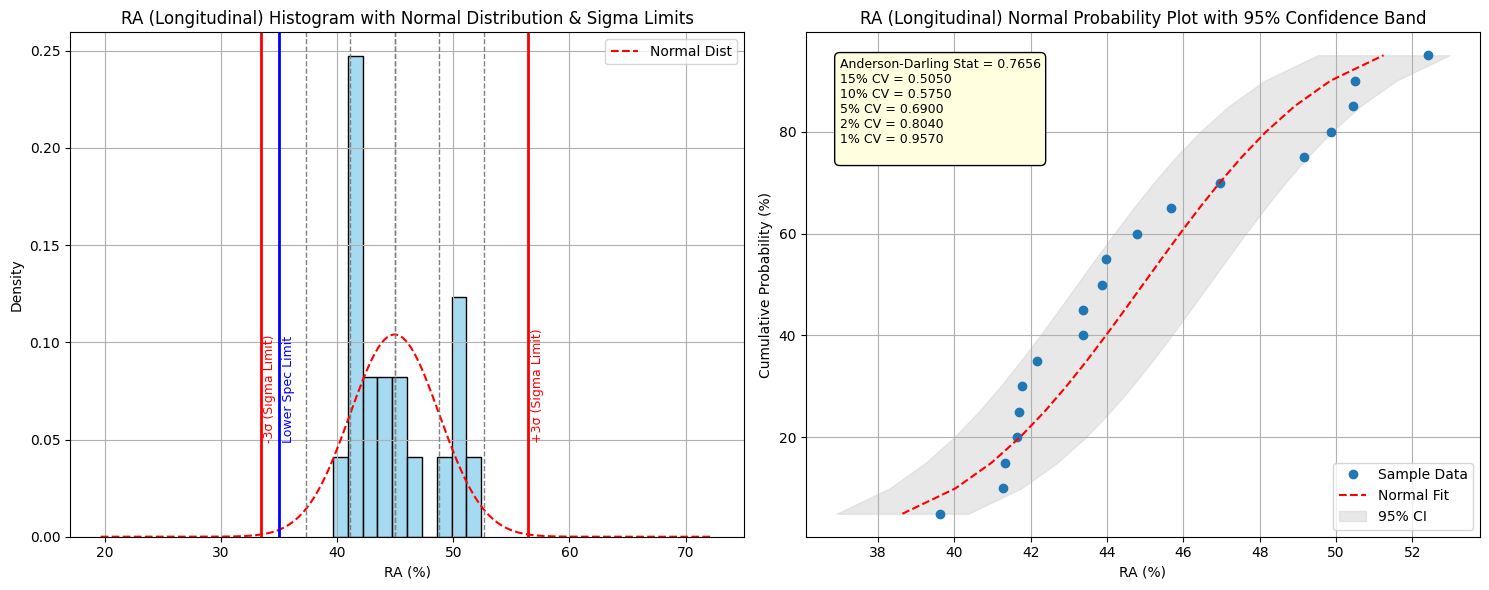

In [42]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'RA': [52.4,41.69,41.65,41.32,41.28,42.16,43.86,43.37,41.78,44.79,39.62,43.97,45.68,46.96,43.37,49.16,50.5,50.45,49.87,]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
RA = df['RA'].sort_values().values
mean = np.mean(RA)
std = np.std(RA, ddof=1)
n = len(RA)

# Step 4: Anderson-Darling Test
result = anderson(RA, dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === Left Plot: Histogram === #
sns.histplot(RA, kde=False, stat='density', bins=10, color='skyblue', ax=axes[0], edgecolor='black')
x = np.linspace(min(RA) - 20, max(RA) + 20, 200)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Sigma limits
for i in range(0, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 0.2, 0.05, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 0.2, 0.05, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 35
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Lower_Spec + 0.2, 0.05, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

axes[0].set_title('RA (Longitudinal) Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('RA (%)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# === Right Plot: Normal Probability Plot === #
# Calculate normal probability values
sorted_data = RA
percentiles = np.arange(1, n+1) / (n + 1) * 100  # cumulative percentage
theoretical_quantiles = norm.ppf(percentiles / 100, loc=mean, scale=std)

# Confidence interval bounds (approximate for normal)
z_critical = 1.96  # for 95%
se = (std / np.sqrt(n))  # standard error
ci_upper = theoretical_quantiles + z_critical * se
ci_lower = theoretical_quantiles - z_critical * se

# Plot data points
axes[1].plot(sorted_data, percentiles, 'o', label='Sample Data')
axes[1].plot(theoretical_quantiles, percentiles, 'r--', label='Normal Fit')
axes[1].fill_betweenx(percentiles, ci_lower, ci_upper, color='lightgray', alpha=0.5, label='95% CI')

# Labels and annotation
axes[1].set_title('RA (Longitudinal) Normal Probability Plot with 95% Confidence Band')
axes[1].set_xlabel('RA (%)')
axes[1].set_ylabel('Cumulative Probability (%)')
axes[1].grid(True)
axes[1].legend()

# Anderson-Darling annotation
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

# Final layout
plt.tight_layout()
plt.show()



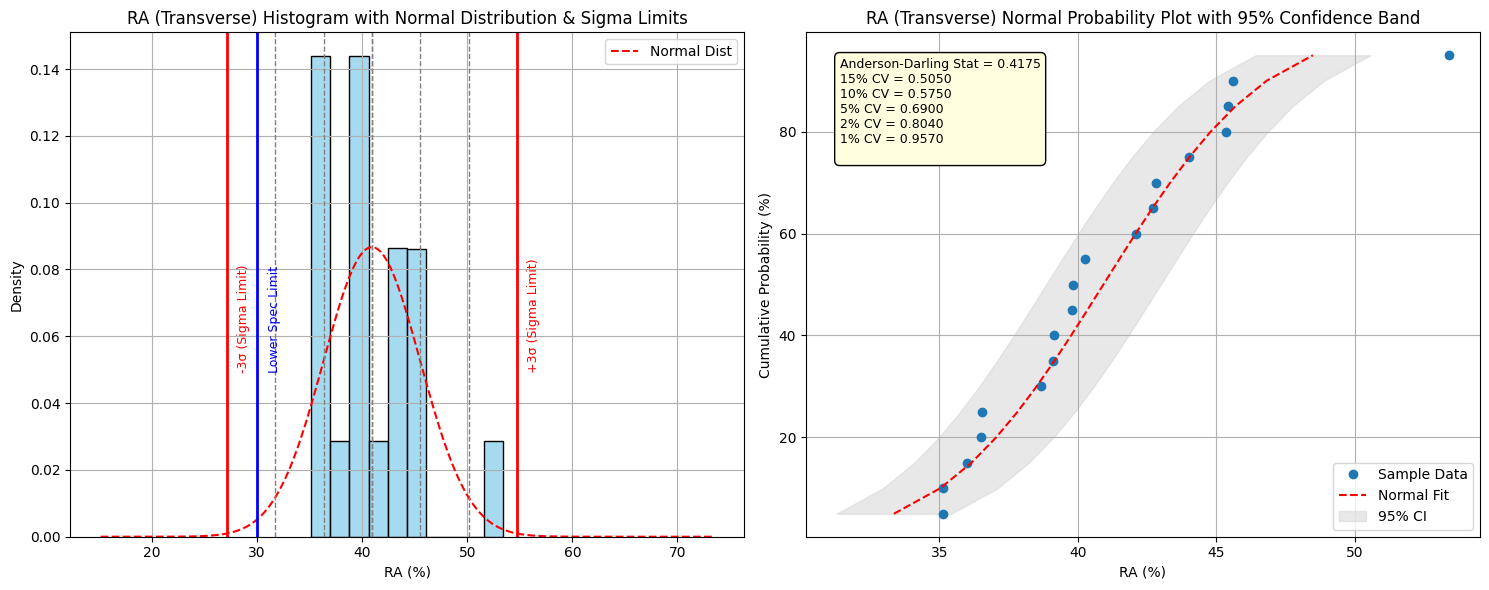

In [40]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'RA': [53.42,38.69,36,36.51,36.53,35.12,44,40.25,39.13,45.43,42.12,39.1,35.12,39.83,45.61,45.37,39.78,42.73,42.84]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
RA = df['RA'].sort_values().values
mean = np.mean(RA)
std = np.std(RA, ddof=1)
n = len(RA)

# Step 4: Anderson-Darling Test
result = anderson(RA, dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === Left Plot: Histogram === #
sns.histplot(RA, kde=False, stat='density', bins=10, color='skyblue', ax=axes[0], edgecolor='black')
x = np.linspace(min(RA) - 20, max(RA) + 20, 200)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Sigma limits
for i in range(0, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 1, 0.05, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 1, 0.05, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 30
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Lower_Spec + 1, 0.05, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

axes[0].set_title('RA (Transverse) Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('RA (%)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# === Right Plot: Normal Probability Plot === #
# Calculate normal probability values
sorted_data = RA
percentiles = np.arange(1, n+1) / (n + 1) * 100  # cumulative percentage
theoretical_quantiles = norm.ppf(percentiles / 100, loc=mean, scale=std)

# Confidence interval bounds (approximate for normal)
z_critical = 1.96  # for 95%
se = (std / np.sqrt(n))  # standard error
ci_upper = theoretical_quantiles + z_critical * se
ci_lower = theoretical_quantiles - z_critical * se

# Plot data points
axes[1].plot(sorted_data, percentiles, 'o', label='Sample Data')
axes[1].plot(theoretical_quantiles, percentiles, 'r--', label='Normal Fit')
axes[1].fill_betweenx(percentiles, ci_lower, ci_upper, color='lightgray', alpha=0.5, label='95% CI')

# Labels and annotation
axes[1].set_title('RA (Transverse) Normal Probability Plot with 95% Confidence Band')
axes[1].set_xlabel('RA (%)')
axes[1].set_ylabel('Cumulative Probability (%)')
axes[1].grid(True)
axes[1].legend()

# Anderson-Darling annotation
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

# Final layout
plt.tight_layout()
plt.show()



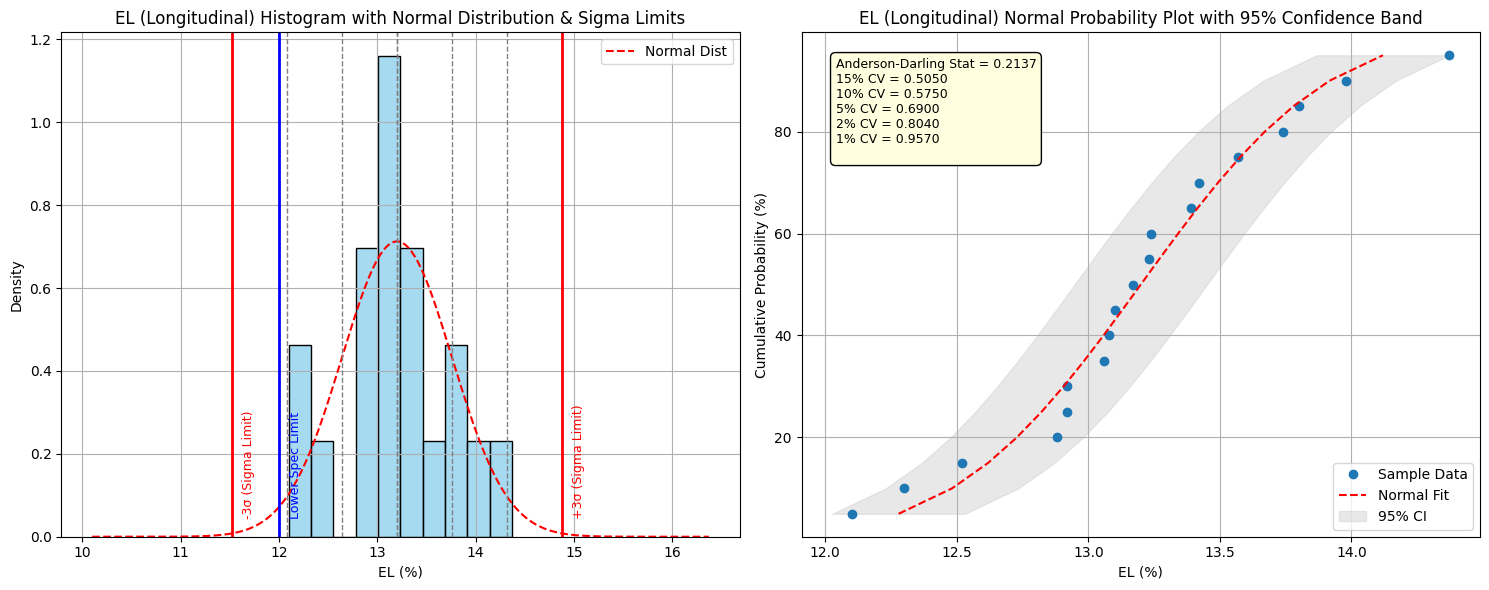

In [39]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'EL': [13.24,13.39,13.08,13.74,12.92,12.88,13.1,12.1,13.8,13.57,13.17,12.52,12.92,12.3,13.42,13.06,13.98,14.37,13.23]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
EL = df['EL'].sort_values().values
mean = np.mean(EL)
std = np.std(EL, ddof=1)
n = len(EL)

# Step 4: Anderson-Darling Test
result = anderson(EL, dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === Left Plot: Histogram === #
sns.histplot(EL, kde=False, stat='density', bins=10, color='skyblue', ax=axes[0], edgecolor='black')
x = np.linspace(min(EL) - 2, max(EL) + 2, 200)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Sigma limits
for i in range(0, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 0.1, 0.05, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 0.1, 0.05, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 12
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Lower_Spec + 0.1, 0.05, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

axes[0].set_title('EL (Longitudinal) Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('EL (%)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# === Right Plot: Normal Probability Plot === #
# Calculate normal probability values
sorted_data = EL
percentiles = np.arange(1, n+1) / (n + 1) * 100  # cumulative percentage
theoretical_quantiles = norm.ppf(percentiles / 100, loc=mean, scale=std)

# Confidence interval bounds (approximate for normal)
z_critical = 1.96  # for 95%
se = (std / np.sqrt(n))  # standard error
ci_upper = theoretical_quantiles + z_critical * se
ci_lower = theoretical_quantiles - z_critical * se

# Plot data points
axes[1].plot(sorted_data, percentiles, 'o', label='Sample Data')
axes[1].plot(theoretical_quantiles, percentiles, 'r--', label='Normal Fit')
axes[1].fill_betweenx(percentiles, ci_lower, ci_upper, color='lightgray', alpha=0.5, label='95% CI')

# Labels and annotation
axes[1].set_title('EL (Longitudinal) Normal Probability Plot with 95% Confidence Band')
axes[1].set_xlabel('EL (%)')
axes[1].set_ylabel('Cumulative Probability (%)')
axes[1].grid(True)
axes[1].legend()

# Anderson-Darling annotation
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

# Final layout
plt.tight_layout()
plt.show()



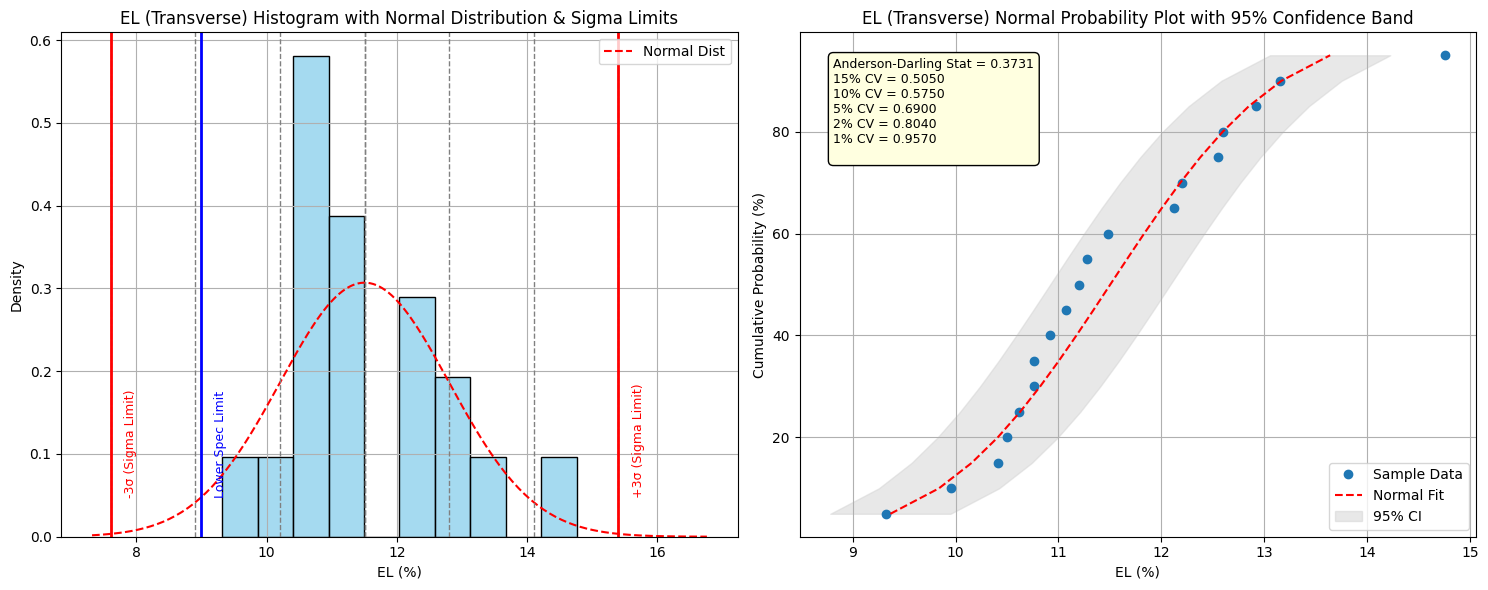

In [38]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'EL': [14.76,13.15,12.55,11.07,10.41,12.12,10.5,10.92,10.76,11.2,12.92,10.76,9.96,11.28,10.62,12.6,9.32,12.2,11.48,]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
EL = df['EL'].sort_values().values
mean = np.mean(EL)
std = np.std(EL, ddof=1)
n = len(EL)

# Step 4: Anderson-Darling Test
result = anderson(EL, dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === Left Plot: Histogram === #
sns.histplot(EL, kde=False, stat='density', bins=10, color='skyblue', ax=axes[0], edgecolor='black')
x = np.linspace(min(EL) - 2, max(EL) + 2, 200)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Sigma limits
for i in range(0, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 0.2, 0.05, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 0.2, 0.05, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 9
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Lower_Spec + 0.2, 0.05, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

axes[0].set_title('EL (Transverse) Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('EL (%)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# === Right Plot: Normal Probability Plot === #
# Calculate normal probability values
sorted_data = EL
percentiles = np.arange(1, n+1) / (n + 1) * 100  # cumulative percentage
theoretical_quantiles = norm.ppf(percentiles / 100, loc=mean, scale=std)

# Confidence interval bounds (approximate for normal)
z_critical = 1.96  # for 95%
se = (std / np.sqrt(n))  # standard error
ci_upper = theoretical_quantiles + z_critical * se
ci_lower = theoretical_quantiles - z_critical * se

# Plot data points
axes[1].plot(sorted_data, percentiles, 'o', label='Sample Data')
axes[1].plot(theoretical_quantiles, percentiles, 'r--', label='Normal Fit')
axes[1].fill_betweenx(percentiles, ci_lower, ci_upper, color='lightgray', alpha=0.5, label='95% CI')

# Labels and annotation
axes[1].set_title('EL (Transverse) Normal Probability Plot with 95% Confidence Band')
axes[1].set_xlabel('EL (%)')
axes[1].set_ylabel('Cumulative Probability (%)')
axes[1].grid(True)
axes[1].legend()

# Anderson-Darling annotation
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

# Final layout
plt.tight_layout()
plt.show()



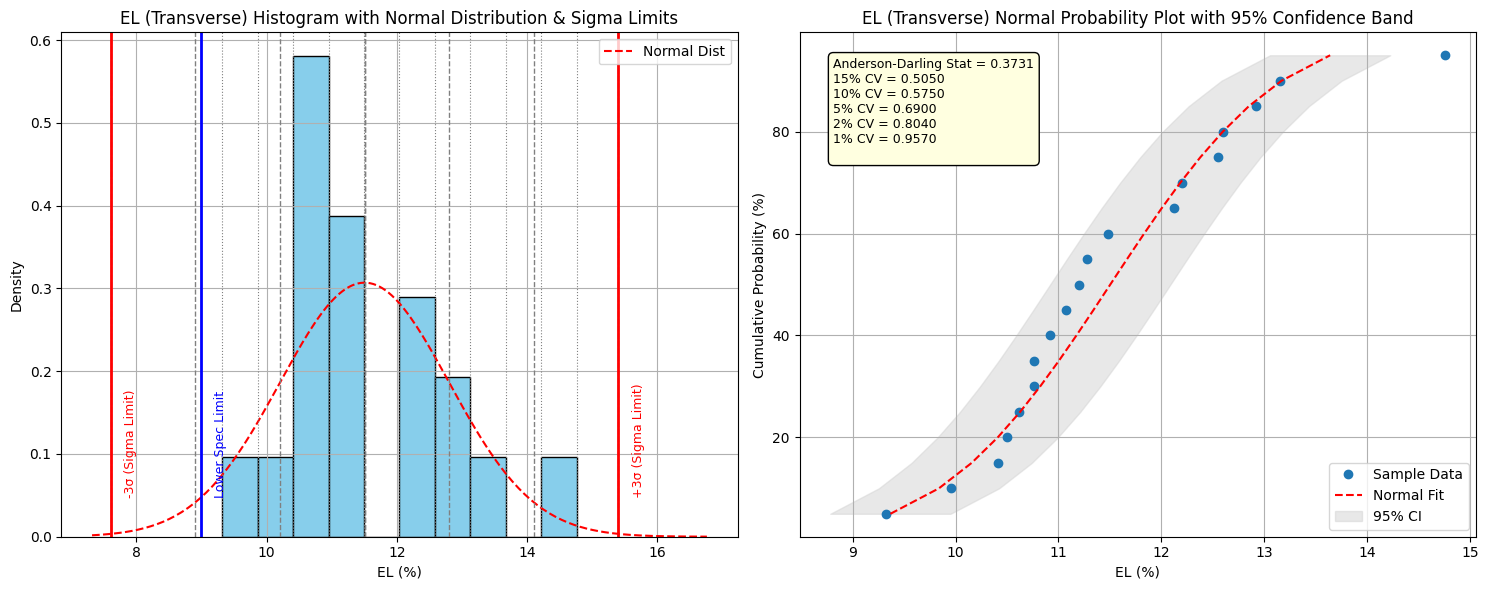

In [50]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson, norm
import numpy as np

# Step 2: Input data
data = {
    'Heat No': [
        800035, 800045, 800046, 800049, 800050, 800051, 800052,
        800053, 800054, 800055, 800084, 800086, 800087, 800091,
        800092, 800093, 800094, 800095, 800097
    ],
    'EL': [14.76,13.15,12.55,11.07,10.41,12.12,10.5,10.92,10.76,11.2,12.92,10.76,9.96,11.28,10.62,12.6,9.32,12.2,11.48,]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)
EL = df['EL'].sort_values().values
mean = np.mean(EL)
std = np.std(EL, ddof=1)
n = len(EL)

# Step 4: Anderson-Darling Test
result = anderson(EL, dist='norm')
ad_stat = result.statistic
critical_values = result.critical_values
sig_levels = result.significance_level

# Step 5: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === Left Plot: Histogram === #
bin_count = 10
counts, bins, patches = axes[0].hist(EL, bins=bin_count, density=True, color='skyblue', edgecolor='black')

# Remove grid from the plot
axes[0].grid(False)

x = np.linspace(min(EL) - 2, max(EL) + 2, 200)
p = norm.pdf(x, mean, std)
axes[0].plot(x, p, 'r--', label='Normal Dist')

# Sigma limits
for i in range(0, 4):
    axes[0].axvline(mean + i*std, color='grey', linestyle='--', linewidth=1)
    axes[0].axvline(mean - i*std, color='grey', linestyle='--', linewidth=1)

axes[0].axvline(mean + 3*std, color='red', linestyle='-', linewidth=2)
axes[0].axvline(mean - 3*std, color='red', linestyle='-', linewidth=2)
axes[0].text(mean + 3*std + 0.2, 0.05, '+3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)
axes[0].text(mean - 3*std + 0.2, 0.05, '-3σ (Sigma Limit)', rotation=90, color='red', fontsize=9)

# Spec limits
Lower_Spec = 9
axes[0].axvline(Lower_Spec, color='blue', linestyle='-', linewidth=2)
axes[0].text(Lower_Spec + 0.2, 0.05, 'Lower Spec Limit', rotation=90, color='blue', fontsize=9)

for b in bins:
    axes[0].axvline(b, color='gray', linestyle=':', linewidth=0.8)


axes[0].set_title('EL (Transverse) Histogram with Normal Distribution & Sigma Limits')
axes[0].set_xlabel('EL (%)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)



# === Right Plot: Normal Probability Plot === #
# Calculate normal probability values
sorted_data = EL
percentiles = np.arange(1, n+1) / (n + 1) * 100  # cumulative percentage
theoretical_quantiles = norm.ppf(percentiles / 100, loc=mean, scale=std)

# Confidence interval bounds (approximate for normal)
z_critical = 1.96  # for 95%
se = (std / np.sqrt(n))  # standard error
ci_upper = theoretical_quantiles + z_critical * se
ci_lower = theoretical_quantiles - z_critical * se

# Plot data points
axes[1].plot(sorted_data, percentiles, 'o', label='Sample Data')
axes[1].plot(theoretical_quantiles, percentiles, 'r--', label='Normal Fit')
axes[1].fill_betweenx(percentiles, ci_lower, ci_upper, color='lightgray', alpha=0.5, label='95% CI')

# Labels and annotation
axes[1].set_title('EL (Transverse) Normal Probability Plot with 95% Confidence Band')
axes[1].set_xlabel('EL (%)')
axes[1].set_ylabel('Cumulative Probability (%)')
axes[1].grid(True)
axes[1].legend()

# Anderson-Darling annotation
textstr = f'Anderson-Darling Stat = {ad_stat:.4f}\n'
for i in range(len(sig_levels)):
    textstr += f'{int(sig_levels[i])}% CV = {critical_values[i]:.4f}\n'

axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='black'))

# Final layout
plt.tight_layout()
plt.show()

